# **IMDB Sentiment Analysis with Keras**

Sentiment analysis is performed on the **IMDB movie reviews dataset** that comes bundled with **Keras**. The dataset contains **50,000 labeled reviews**, split into **25,000 training samples** (with a validation split) and **25,000 test samples**. Reviews are integer-encoded, where only the **10,000 most frequent words** are retained to build the vocabulary.

In [ ]:
from tensorflow.keras.datasets import imdb #type:ignore
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [38]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [39]:
train_labels[0]

np.int64(1)

In [40]:
max([max(sequence) for sequence in train_data])

9999

In [41]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [42]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [43]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], shape=(10000,))

In [44]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
import tensorflow
from tensorflow import keras #type:ignore
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import AUC #type:ignore
from tensorflow.keras.layers import Dense, Dropout #type:ignore

In [46]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10000,)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [47]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 32)             │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,121 (1.22 MB)

 Trainable params: 321,121 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc')]
)
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.6344 - auc: 0.6953 - loss: 0.6381 - val_accuracy: 0.8362 - val_auc: 0.9116 - val_loss: 0.5013
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8086 - auc: 0.8872 - loss: 0.4577 - val_accuracy: 0.8762 - val_auc: 0.9440 - val_loss: 0.3415
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8786 - auc: 0.9418 - loss: 0.3285 - val_accuracy: 0.8883 - val_auc: 0.9533 - val_loss: 0.2807
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9127 - auc: 0.9657 - loss: 0.2492 - val_accuracy: 0.8902 - val_auc: 0.9557 - val_loss: 0.2692
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9325 - auc: 0.9781 - loss: 0.1979 - val_accuracy: 0.8888 - val_auc: 0.9561 - val_loss: 0.2752
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9469 - auc: 0.9842 - loss: 0.1667 - val_accuracy: 0.8888 - val_auc: 0.9548 - val_loss: 0.2892
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21m

In [51]:
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [52]:
y_pred_class = (y_pred > 0.5).astype(int)

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert probabilities to class labels
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_class))


Accuracy: 0.86724

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     12500
         1.0       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


Confusion Matrix:
 [[10994  1506]
 [ 1813 10687]]


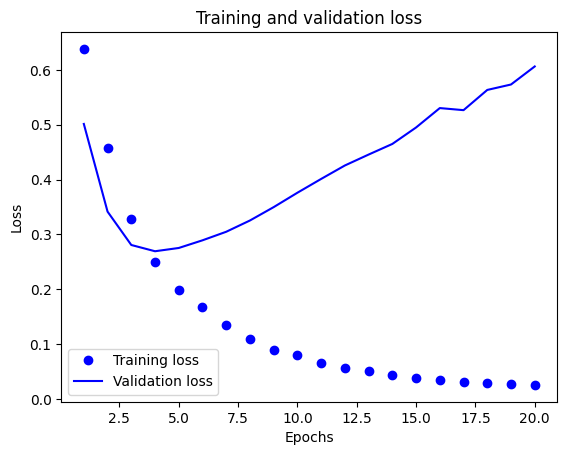

In [54]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

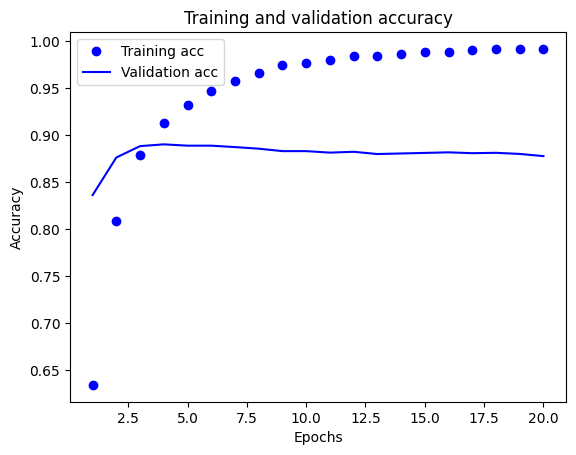

In [56]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()